In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
hr_data = pd.read_csv("hr_data.csv")

categorical_cols = ['city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

for i in categorical_cols: 
    le = preprocessing.LabelEncoder()
    le.fit(hr_data[i].unique())
    hr_data[i] = le.transform(hr_data[i])

target = 'target'
cols = ['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']

#splitn into training and testing data sets
train, test = train_test_split(hr_data, test_size=0.3, random_state = 30)


# Random Hill Climb

In [51]:
start_time = time.time()
nn_random = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                     algorithm = 'random_hill_climb', max_iters = 200,
                                     bias = True, is_classifier = True, curve = True,
                                     random_state = 2)

nn_random.fit(train[cols], train[target])
random_runtime = time.time() -start_time
random_fitness_curve = nn_random.fitness_curve
iters = np.linspace(1, len(random_fitness_curve), num = len(random_fitness_curve))
random_accuracy_test = accuracy_score(test[target], nn_random.predict(test[cols]))
random_accuracy_train = accuracy_score(train[target], nn_random.predict(train[cols]))

In [65]:
x = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                     algorithm = 'random_hill_climb', max_iters = 1,
                                     bias = True, is_classifier = True, curve = True,
                                     random_state = 2)

x.fit(train[cols], train[target])
accuracy_score(test[target], x.predict(test[cols]))
x.fitness_curve

array([-0.69298847])

# Simulated Annealing

In [50]:
start_time = time.time()
nn_sa = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                     algorithm = 'simulated_annealing',max_iters = 200,
                                     bias = True, is_classifier = True, 
                                     random_state = 2, curve = True)

nn_sa.fit(train[cols], train[target])
sa_runtime = time.time() -start_time
sa_fitness_curve = nn_sa.fitness_curve
sa_accuracy_test = accuracy_score(test[target], nn_sa.predict(test[cols]))
sa_accuracy_train = accuracy_score(train[target], nn_sa.predict(train[cols]))

In [10]:
nn_sa.fitted_weights

array([ 7.19898043e-02, -1.04814754e+00, -6.75044243e-04,  7.06447852e-02,
       -2.59264396e-01, -1.39330358e-01, -3.90702732e-01,  4.38541933e-01,
       -6.90652651e-04, -6.66345450e-01, -5.77323345e-02, -1.41715811e-01,
       -6.30840109e-01, -7.28437575e-02, -5.31120269e-01,  5.70670296e-01,
        7.07950585e-01,  3.88473675e-01,  8.93122971e-01, -4.40709046e-01,
        1.04921802e-02, -7.69426991e-01, -1.43755345e-01, -9.06938169e-01,
       -8.45680057e-01,  2.93490618e-01, -6.47975999e-01, -5.86108631e-01])

#  Genetic Algorithm

In [49]:
start_time = time.time()
nn_ga = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                     algorithm = 'genetic_alg',
                                     bias = True, is_classifier = True,  max_iters = 200,
                                     random_state = 2, curve = True)
nn_ga.fit(train[cols], train[target])
ga_runtime = time.time() -start_time

ga_fitness_curve = nn_ga.fitness_curve
ga_accuracy_test = accuracy_score(test[target], nn_ga.predict(test[cols]))
ga_accuracy_train = accuracy_score(train[target], nn_ga.predict(train[cols]))

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Users/nicole/Library/Python/3.9/lib/python/site-packages/mlrose/activation.py:77:

# Basic Backpropagation

In [61]:
start_time = time.time()
nn_bp = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', 
                                     bias = True, is_classifier = True, max_iters = 200,
                                     random_state = 2, curve = True)
nn_bp.fit(train[cols], train[target])
bp_runtime = time.time() -start_time

bp_fitness_curve = nn_bp.fitness_curve
bp_accuracy_test = accuracy_score(test[target], nn_bp.predict(test[cols]))
bp_accuracy_train = accuracy_score(train[target], nn_bp.predict(train[cols]))

In [62]:
bp_accuracy_train

0.7507829977628635

In [63]:
bp_accuracy_test

0.750347947112039

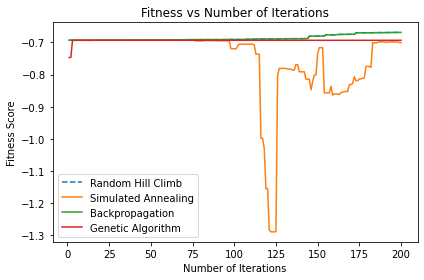

In [42]:
plt.plot(iters, random_fitness_curve, '--', color="k", label = "Random Hill Climb")
plt.plot(iters, sa_fitness_curve, label = "Simulated Annealing")
plt.plot(iters, bp_fitness_curve, label = "Backpropagation")
plt.plot(iters, ga_fitness_curve, label = "Genetic Algorithm")


plt.title("Fitness vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [31]:
print(bp_accuracy)
print(sa_accuracy)
print(ga_accuracy)
print(random_accuracy)

0.750347947112039
0.750347947112039
0.750347947112039
0.750347947112039


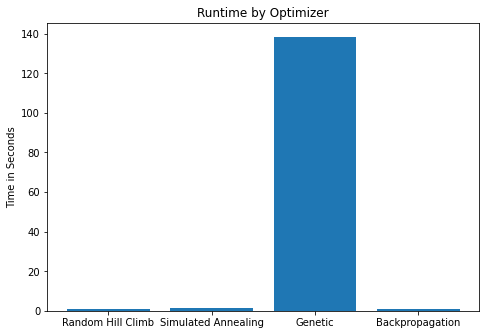

In [41]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'Backpropagation']
runtime = [random_runtime, sa_runtime, ga_runtime, bp_runtime]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.title("Runtime by Optimizer")
plt.ylabel("Time in Seconds") 
plt.show()


In [ ]:
#Optimizer, Runtime, Test Accuracy, Train Accuracy, Weight FItness